In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("insurance.csv")
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
threshold = df['charges'].quantile(0.99)
high_claims = df[df['charges'] > threshold]
print(f"Number of suspicious high-amount claims: {len(high_claims)}")


Number of suspicious high-amount claims: 14


In [7]:
# Assumes 'patient_id' and 'claim_id' columns exist
frequent_claims = df['bmi'].value_counts()
frequent_patients = frequent_claims[frequent_claims > 10]
print(f"Patients with more than 10 claims: {len(frequent_patients)}")


Patients with more than 10 claims: 1


In [8]:
df['z_score'] = zscore(df['charges'])
anomalies = df[df['z_score'].abs() > 3]
print(f"Anomalous claims (Z-score > 3): {len(anomalies)}")


Anomalous claims (Z-score > 3): 7


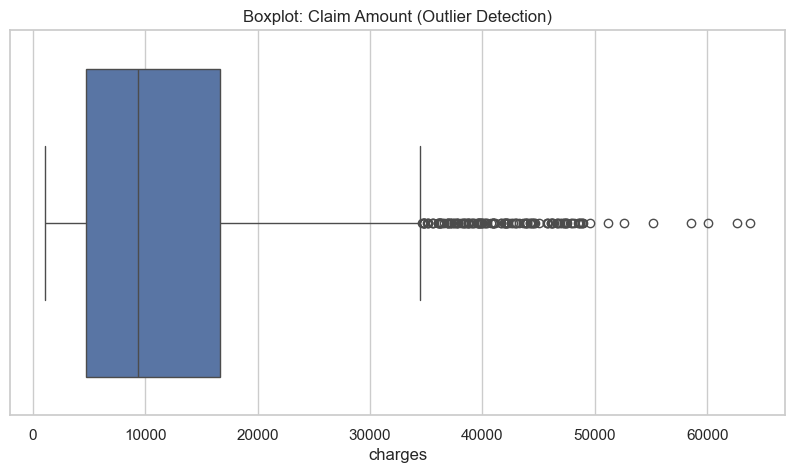

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['charges'])
plt.title("Boxplot: Claim Amount (Outlier Detection)")
plt.show()


In [11]:
if 'department' in df.columns:
    dept_costs = df.groupby('department')['charges'].sum().sort_values(ascending=False)
    dept_costs.plot(kind='barh', figsize=(10,6), title='Top Cost Centers by Department')
    plt.xlabel('Total Claim Amount')
    plt.show()


In [12]:
df['capped_claim'] = np.where(df['charges'] > 10000, 10000, df['charges'])

original_total = df['charges'].sum()
capped_total = df['capped_claim'].sum()
savings = original_total - capped_total

print(f"Original Total: ₹{original_total:,.2f}")
print(f"Capped Total: ₹{capped_total:,.2f}")
print(f"Simulated Savings: ₹{savings:,.2f}")


Original Total: ₹17,755,824.99
Capped Total: ₹9,967,549.01
Simulated Savings: ₹7,788,275.98
